### K-Means
- Amaç gözlemleri birbirlerine olan benzerliklerine göre kümlere ayırmaktır.

-  **K-Means Adimlari**
    
   * Adım1: Küme sayısı belirlenir.

   * Adım2: Rastgele 𝑘 merkez seçilir.

   * Adım3: Her gözlem için 𝑘 merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın 𝑘 merkezine atanır.

   * Adım4: Her gözlem en yakın olduğu merkeze yani kümeye atanır.

   * Adım5: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.

   * Adım6: Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

![](https://bs-cms-media-prod.s3.ap-south-1.amazonaws.com/K_means_clustering_cd34c9feb8.png)

In [153]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

#### Veri Seti Hikayesi
- USArrests veri seti, ABD'deki eyaletler bazında suç oranlarını içermektedir. Veri setinin sütunları şu şekilde açıklanabilir:

* Unnamed: 0: Eyaletlerin adlarını içerir (ör. Alabama, Alaska, Arizona).
* Murder: Her 100.000 kişi başına işlenen cinayet oranı.
* Assault: Her 100.000 kişi başına saldırı sayısı.
* UrbanPop: Kentsel nüfus yüzdesi (%).
* Rape: Her 100.000 kişi başına tecavüz oranı.

  
- Bu veri seti, ABD'deki suç oranlarının eyalet bazında nasıl farklılaştığını anlamak ve eyaletlerin suç profillerini değerlendirmek için kullanılabilir.


In [156]:
df = pd.read_csv('USArrests.csv').copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [158]:
df.index = df.iloc[:,0]

In [160]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [162]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [164]:
df = df.iloc[:,1:5]

In [166]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [168]:
#del df.index.name
df.index.name = None


In [170]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [172]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


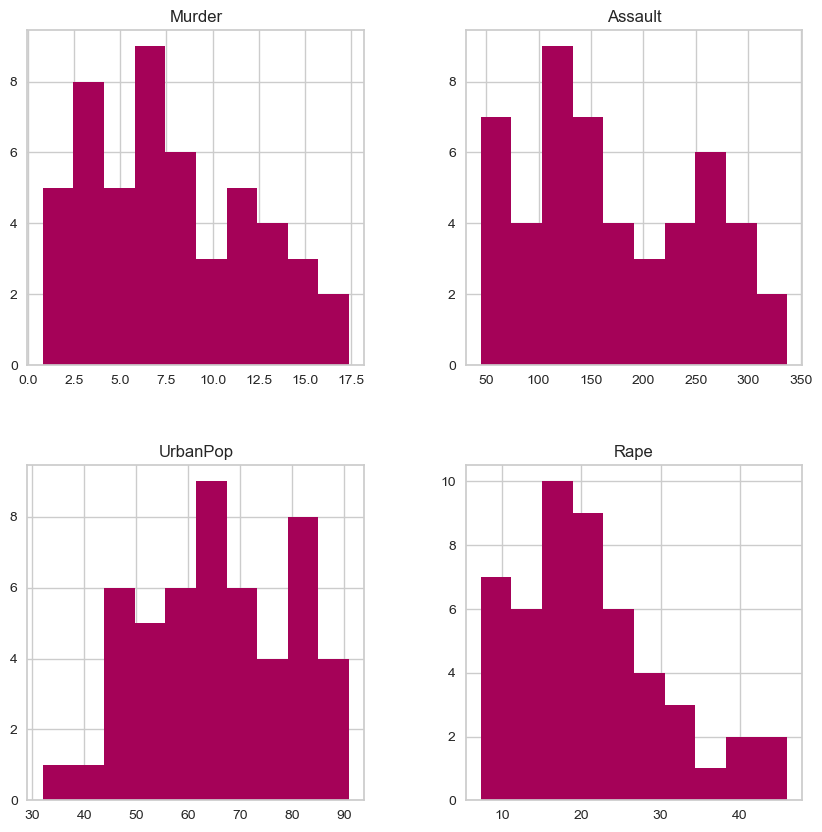

In [178]:
df.hist(figsize = (10,10) , color='m');

### K-Means Model ve Gorsellestirme

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [130]:
# n_init = merkez sayisi 
# n_clusters = kume sayisi 

In [132]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\abdurezzak ekidi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from t

In [134]:
clust = kmeans.fit(df)

In [136]:
clust.n_clusters

4

In [138]:
# merkezlerine erismek icin
clust.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714,
          1.        ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ,
          2.        ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ,
          3.        ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ,
          2.        ]])

In [140]:
#  hangi  eyalet hangi cluster(kumeyi) aldi bilgisine erismek icin
clust.labels_

array([2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 2, 0, 3, 3, 2, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 1, 0, 0, 3,
       1, 0, 0, 1, 1, 0])

In [142]:
# gorsellestirme  clusters= kumeler(cl)
kmeans = KMeans(n_clusters=2)
clust = kmeans.fit(df)

In [144]:
cl = kmeans.labels_

In [146]:
cl

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

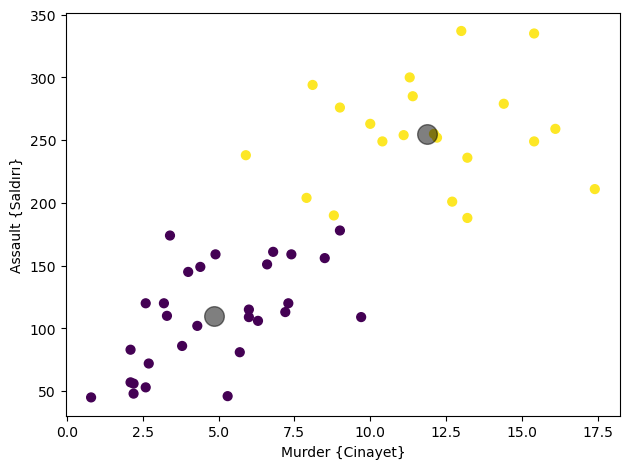

In [27]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=kumeler,s=40,cmap='viridis');

merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)

plt.xlabel('Murder {Cinayet}')
plt.ylabel('Assault {Saldırı}')

plt.tight_layout()
plt.show()


In [28]:
df.iloc[:,1]

Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48
Virginia  

### Kumlerin 3 boyutlu bir sekilde  gorsellestirilmesi

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42).fit(df.iloc[:, 1:4])
kumeler = kmeans.labels_
merkezler = kmeans.cluster_centers_

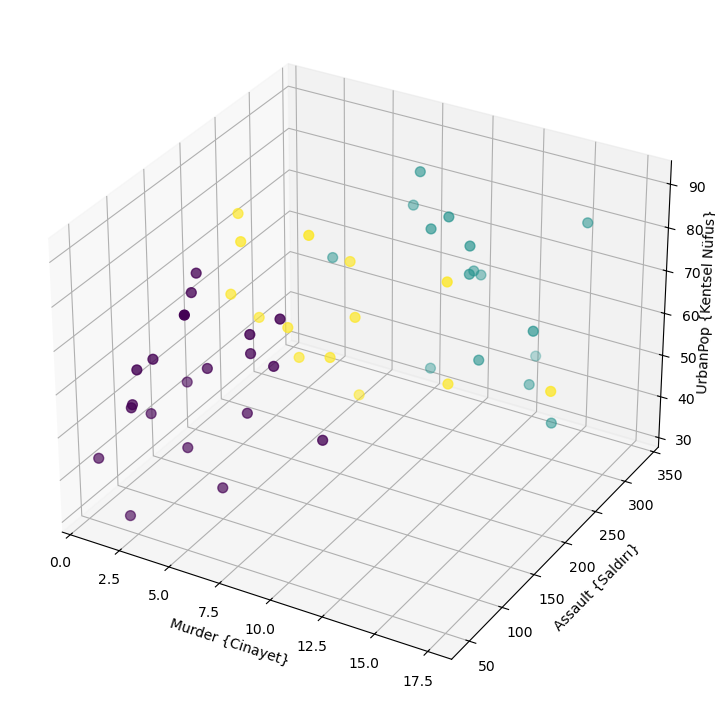

In [32]:
plt.rcParams['figure.figsize']=(16,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 'Axes3D' doğrudan kullanılmaz
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler, cmap='viridis', s=50)

ax.set_xlabel('Murder {Cinayet}')
ax.set_ylabel('Assault {Saldırı}')
ax.set_zlabel('UrbanPop {Kentsel Nüfus}', fontsize=10, labelpad=-2)

plt.show()


In [33]:
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=kumeler, cmap='viridis', s=50)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker='*', color='#050505', s=1000, label='Küme Merkezleri')

ax.set_xlabel('Murder {Cinayet}')
ax.set_ylabel('Assault {Saldırı}')
ax.set_zlabel('UrbanPop {Kentsel Nüfus}', fontsize=10, labelpad=-2)

plt.show()
'''

"\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=kumeler, cmap='viridis', s=50)\nax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],\n           marker='*', color='#050505', s=1000, label='Küme Merkezleri')\n\nax.set_xlabel('Murder {Cinayet}')\nax.set_ylabel('Assault {Saldırı}')\nax.set_zlabel('UrbanPop {Kentsel Nüfus}', fontsize=10, labelpad=-2)\n\nplt.show()\n"

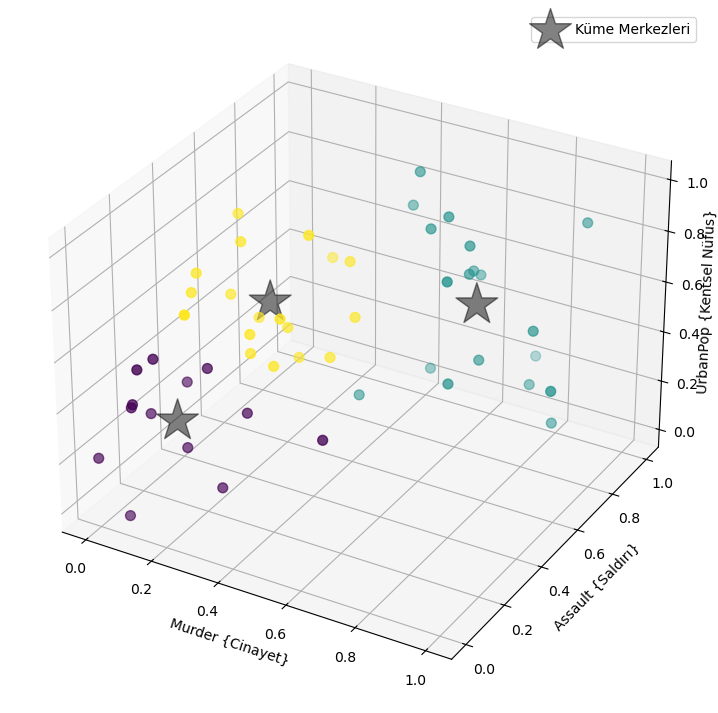

In [104]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Veriyi normalize et
scaler = MinMaxScaler()
df_normalize = scaler.fit_transform(df.iloc[:, :3])  # Yalnızca ilk 3 sütunu normalize et

# Kümeleme işlemi (KMeans örneği)
kmeans = KMeans(n_clusters=3, random_state=42)  # Küme sayısını belirleyin
kumeler = kmeans.fit_predict(df_normalize)  # Küme etiketlerini al

# Küme merkezlerini al
merkezler = kmeans.cluster_centers_  # Küme merkezleri

# Küme merkezlerini normalize et
merkezler_normalized = scaler.transform(merkezler)  # Aynı şekilde normalize et

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalleştirilmiş veri ile kümeleri çiziyoruz
ax.scatter(df_normalize[:, 0], df_normalize[:, 1], df_normalize[:, 2], c=kumeler, cmap='viridis', s=50)

# Normalleştirilmiş küme merkezlerini çiziyoruz
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker='*', color='#050505', s=1000, label='Küme Merkezleri', alpha=0.5)

# Eksen isimleri
ax.set_xlabel('Murder {Cinayet}')
ax.set_ylabel('Assault {Saldırı}')
ax.set_zlabel('UrbanPop {Kentsel Nüfus}', fontsize=10, labelpad=-2)

ax.legend()  # Küme merkezleri için etiket ekleyin
plt.show()


In [35]:
# kumeler ve gozlem 

In [36]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [37]:
# hangi eyaletin hangi cluster(kume)  numarasina sahip oldugu
pd.DataFrame({'Eyaletler': df.index, 'kumeler':kumeler})[0:10]

,Eyaletler,kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


In [38]:
df["kume_no"] = kumeler

In [39]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [40]:
df["kume_no"] = kumeler + 1

In [41]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


#### Optimum Kume Sayisinin Belirlenmesi (Elbow ile{Dirsek})

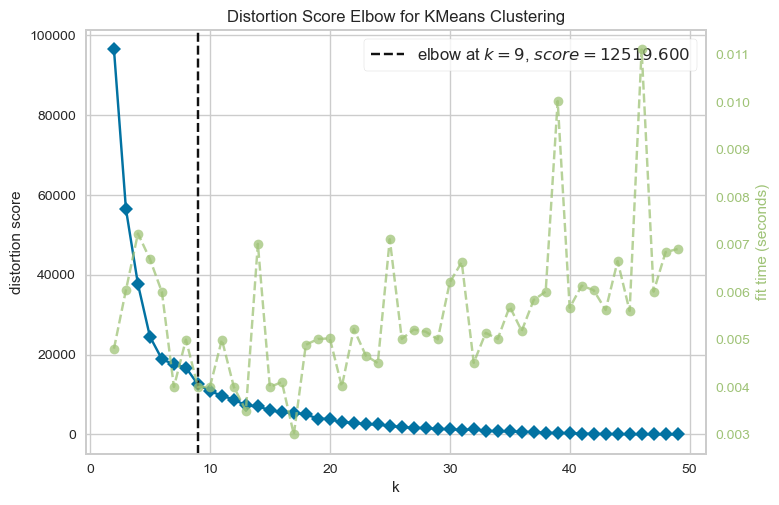

In [123]:
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
# 2 den 20 ye kadar kume sayilarini dene
visualizer = KElbowVisualizer(kmeans,k=(2,50))
visualizer.fit(df)
visualizer.poof();

In [190]:
kmeans = KMeans(n_clusters=9)
clust = kmeans.fit(df)
cl = clust.labels_

In [200]:
pd.DataFrame({"Eyaletler":df.index, "Kumeler": cl})[0:10]

,Eyaletler,Kumeler
0,Alabama,4
1,Alaska,4
2,Arizona,2
3,Arkansas,1
4,California,8
5,Colorado,1
6,Connecticut,3
7,Delaware,4
8,Florida,2
9,Georgia,1


#### Elbow Method  
- (youtube stephanie powers)    
                                         

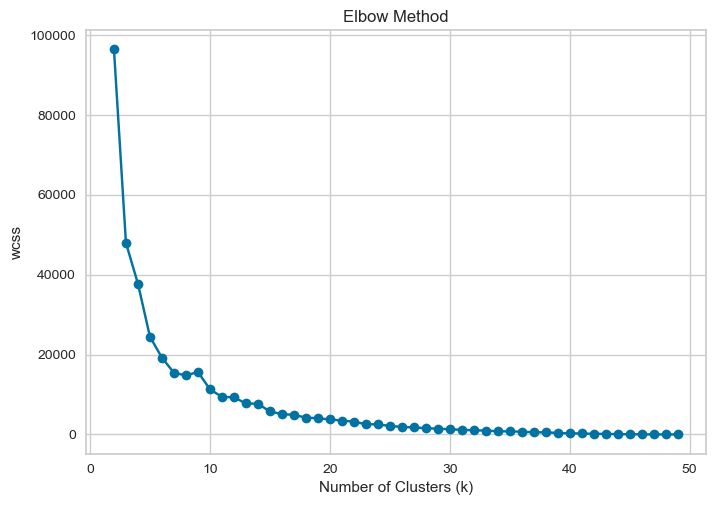

In [188]:
wcss = []
for k in range(2,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# plot the elbow method
plt.plot(range(2,50), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.title("Elbow Method")
plt.show()
    

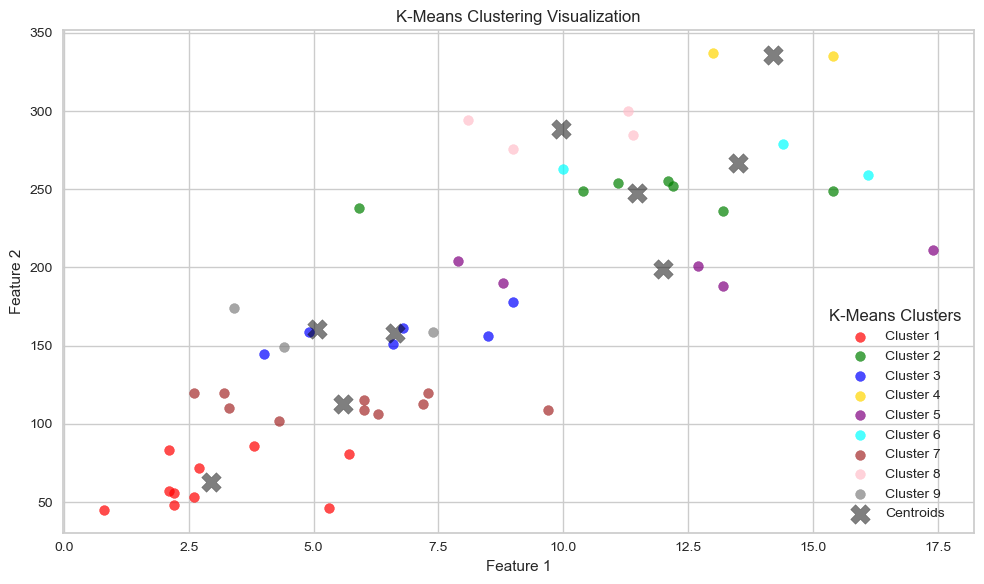

In [220]:
kmeans = KMeans(n_clusters=9)
clust = kmeans.fit(df)
cl = clust.labels_

# Renkler ve etiketler
colors = ['red', 'green', 'blue', 'gold', 'purple', 'cyan', 'brown', 'pink', 'gray']
cluster_labels = [f"Cluster {i+1}" for i in range(9)]

# Scatter plot
plt.figure(figsize=(10, 6))
for i in range(9):  # Her küme için ayrı scatter
    plt.scatter(df.iloc[cl == i, 0], df.iloc[cl == i, 1], c=colors[i], label=cluster_labels[i], s=50, alpha=0.7)

# Küme merkezlerini görselleştirme
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids', alpha=0.5)

# Legend ekleme
plt.legend(loc=4, title="K-Means Clusters", fontsize=10)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


#### Hiyerarşik Kümeleme

- Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır.

![](https://media.licdn.com/dms/image/v2/D4D12AQFLMjsqAoIMKQ/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1701022315764?e=1738195200&v=beta&t=fh8H8YSsojKO4sBQaemZ9VQimHrHFm1ds0iGRVPDc54)

##### Birleştirici Kümeleme
 Baştan sona gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmayı amaçlar.

- Adım 1 Veri setinde birbirine en yakın olan iki gözlem bulunur.

- Adım 2 Bu iki nokta bir araya getirilerek yeni bir gözlem oluşturulur. Yani, artık veri seti ilk birleştirmedeki gözlemlerden oluşmaktadır.

- Adım 3 Aynı işlem tekrarlanarak yukarı doğru çıkılır. İki kümenin birleşiminden oluşan bu yeni kümeler, aynı şekilde birbirlerine benzerliklerine göre tekrar birleştirilir. Bu işlem, tüm gözlemler tek bir küme altında toplanana kadar tekrarlanır.

Birbirine yakın noktalar, uzaklık ölçüleri (Öklit uzaklığı, Manhattan uzaklığı, korelasyon vs.) kullanılarak belirlenir.

##### Bölümleyici kümeleme

Başlangıçta tüm gözlemler tek bir küme içinde yer alır. Bu, tüm veri setidir.

- Adım 1Tüm gözlemler, benzerliklerine göre iki alt kümeye ayrılır.

- Adım 2 yeni oluşan alt kümeler de benzerliklerine göre tekrar alt kümelere ayrılır.

- Adım 3 Aynı işlem, veri setindeki gözlem sayısı kadar tekrarlanır. Sonunda her gözlem kendi içinde benzer gözlemlerle aynı küme içinde yer almış olur.


#### Hiyerarşik vs Hiyerarşik Olmayan vs Karar Ağaçları
* Hiyerarşik yöntemlerde küme sayısına dendrogram sonuçlarına bakılarak karar verilirken, hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce belirlenir.

* Hiyerarşik kümeleme yöntemlerinde veri seti gözlemler ya da değişkenler bazında kümeleme işlemine sokulabilirken hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür.

* Karar ağaçlarından farkı; karar ağaçlarında ayırma işlemi hedef değişkene göre yapılırken burada bağımlı değişken olmadığı için gözlemler bağımsız değişkenler üzerinden yapılan uzaklık hesaplarına göre kümelere ayrılır.

### Uygulama

In [240]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name= None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [242]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [248]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

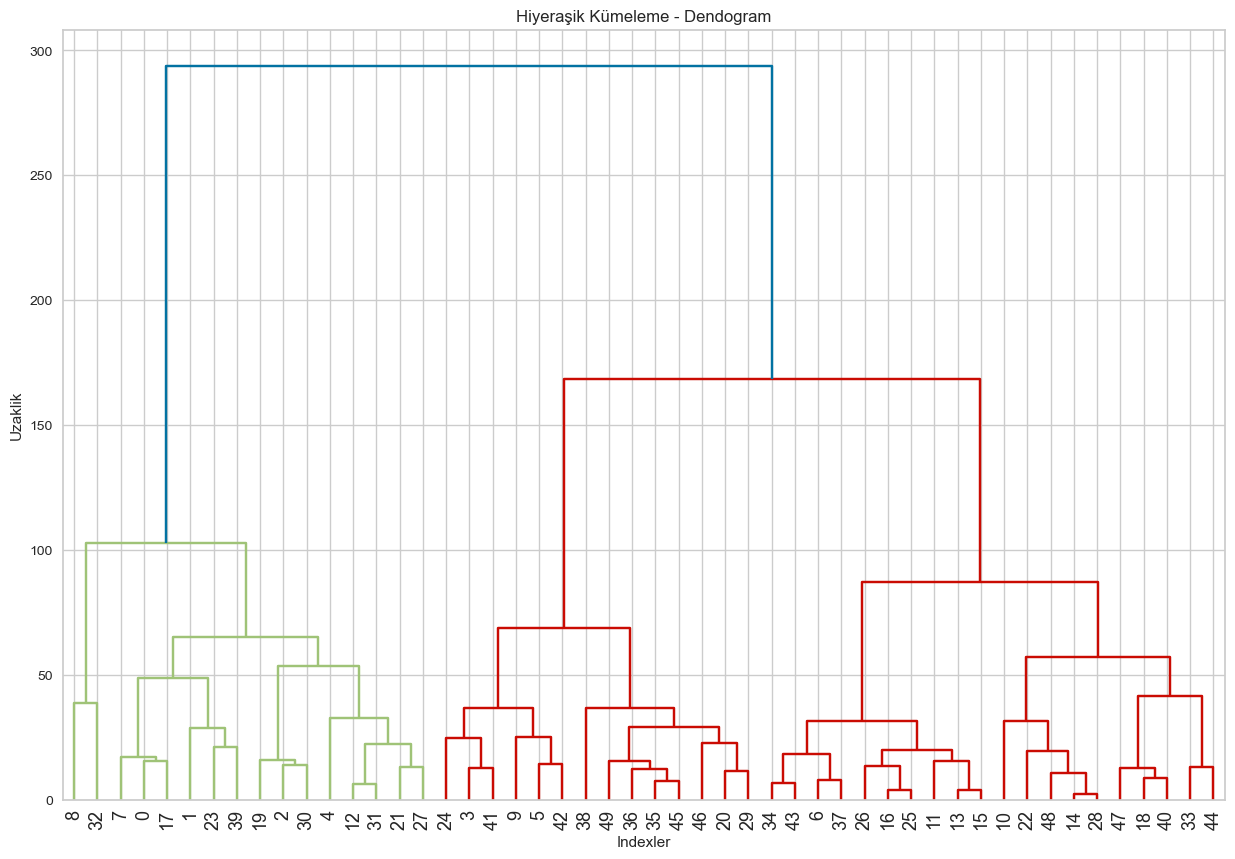

In [332]:
# complete methodunaa  gore bi dendogram olusturacagiz
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_complete,
          leaf_font_size=13);

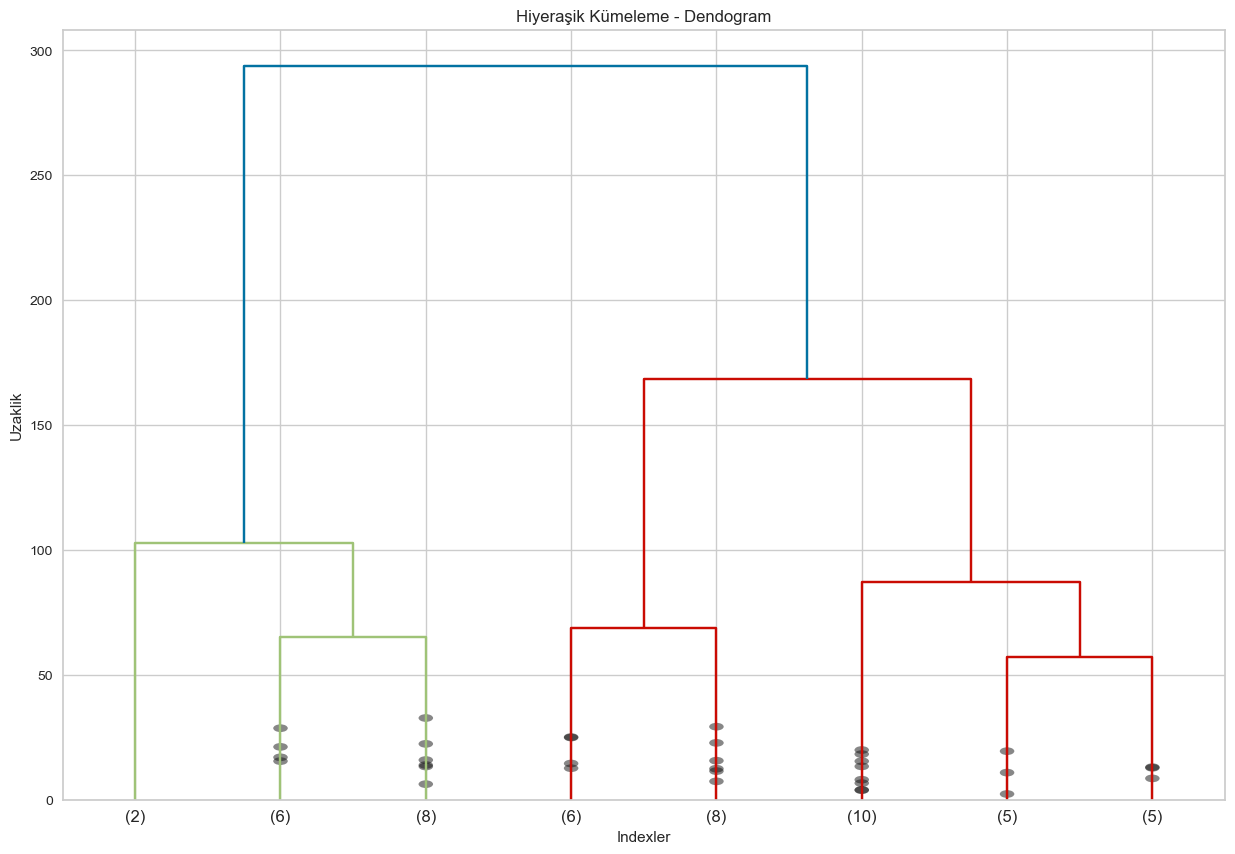

In [266]:
# kumenin altinda kacar tane eleman oldugu bilgisi veriyor 
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(hc_complete,
          truncate_mode= 'lastp',
          p = 8,
          show_contracted=True);

### Ugulama 2 

#### Optimum Kume Sayisi 
- göz yordamı ıle optimum küme sayısı belirlenir

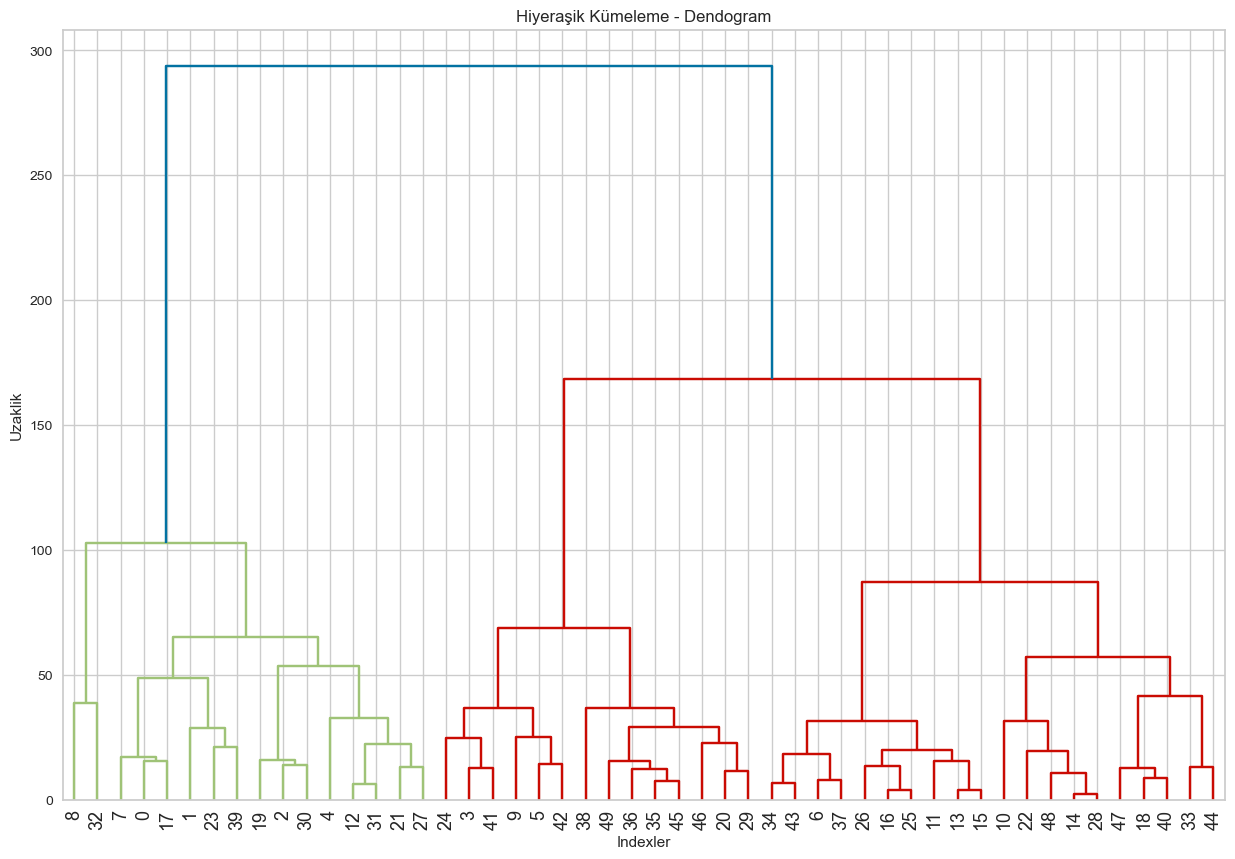

In [303]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
den = dendrogram(
    hc_complete,
    leaf_font_size=13
);


Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2']}
Length:      6
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [284]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [317]:
#metric='euclidean', veri noktaları arasındaki mesafeyi ölçer. (Örneğin, iki nokta ne kadar uzakta?)
#linkage='ward', hangi kümelerin birleşeceğini belirler ve varyansı minimumda tutar.

from sklearn.cluster import AgglomerativeClustering

# Birleştirici kümeleme işlemi
cluster = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',  # affinity yerine metric kullanılıyor
    linkage='ward'
)

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [323]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [325]:
df["Kume_no"] = cluster.fit_predict(df)

In [329]:
df.tail()

,Murder,Assault,UrbanPop,Rape,Kume_no
Virginia,8.5,156,63,20.7,2
Washington,4.0,145,73,26.2,2
West Virginia,5.7,81,39,9.3,1
Wisconsin,2.6,53,66,10.8,1
Wyoming,6.8,161,60,15.6,2


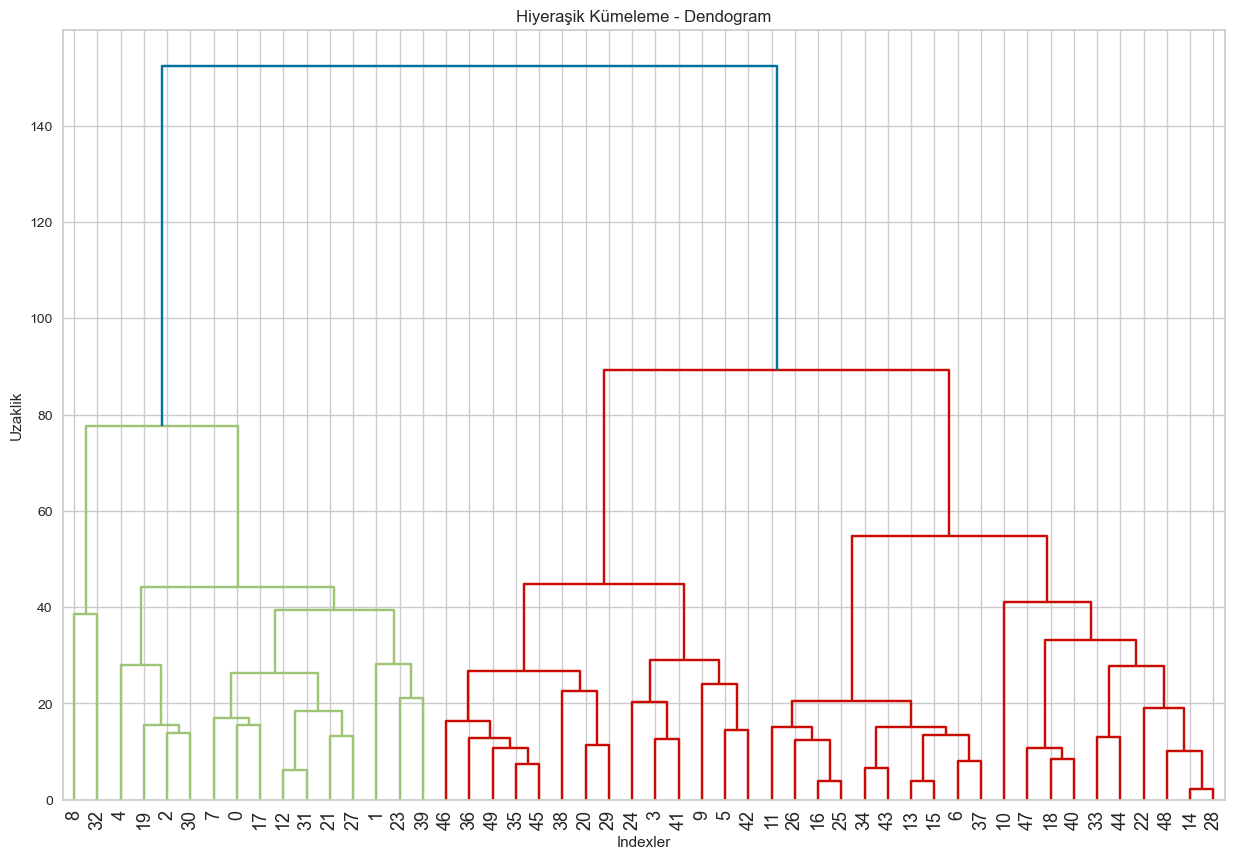

In [334]:
# average methodunaa  gore bi dendogram olusturacagiz
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_average,
          leaf_font_size=13);

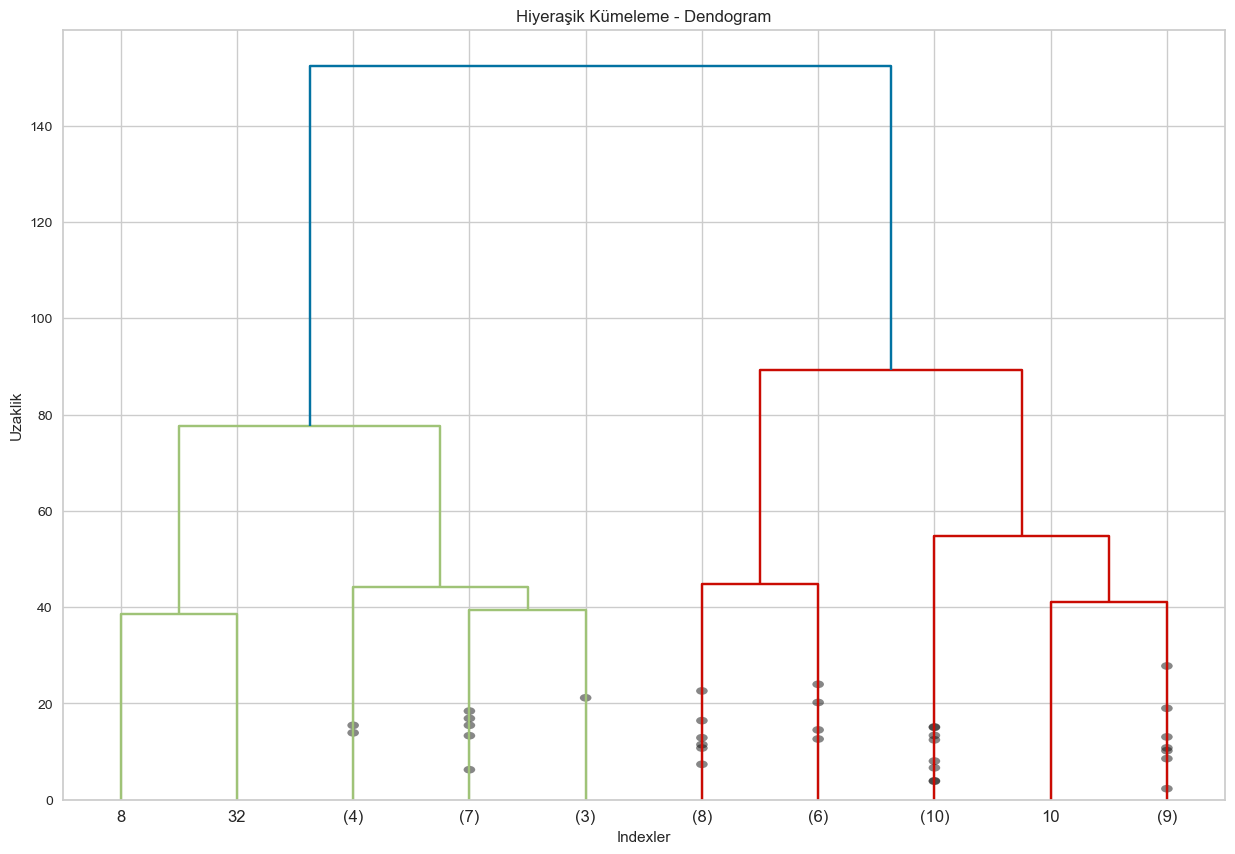

In [344]:
# kumenin altinda kacar tane eleman oldugu bilgisi veriyor 
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(hc_average,
          truncate_mode= 'lastp',
          p = 10,
          show_contracted=True);

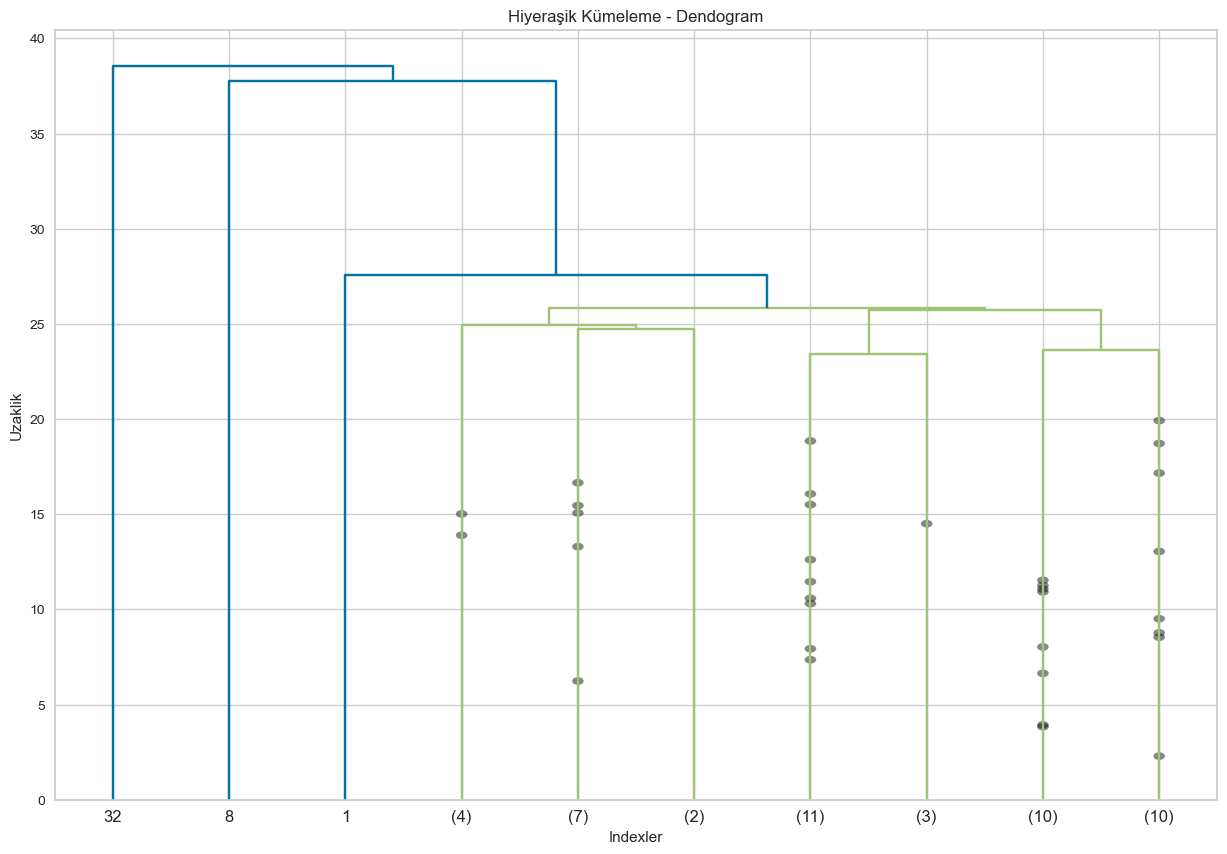

In [342]:
# kumenin altinda kacar tane eleman oldugu bilgisi veriyor 
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hiyeraşik Kümeleme - Dendogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")
dendrogram(hc_single,
          truncate_mode= 'lastp',
          p = 10,
          show_contracted=True);

### Principal component analysis(PCA) Temel Bileşen Analizi
 * Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektr.
     * 
Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.



In [357]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [359]:
from sklearn.preprocessing import StandardScaler

# degiskenlere standatlasma islemi uyguliyoruz/
df = StandardScaler().fit_transform(df)
df[0:5, 0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [388]:
# Yüksek boyutlu veri setlerinde, veriyi daha az boyutta temsil 
#ederek işlemeyi kolaylaştırır.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [390]:
bilesen_df = pd.DataFrame(data=pca_fit,
                          columns=["birinci_bilesen", "ikinci_bilesen", "ucuncu_bilesen"])

In [392]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,-1.133392,-0.444269
1,1.950138,-1.073213,2.040003
2,1.763164,0.745957,0.054781
3,-0.141420,-1.119797,0.114574
4,2.523980,1.542934,0.598557


In [394]:
# aciklanan varyans
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [396]:
pca = PCA().fit(df)

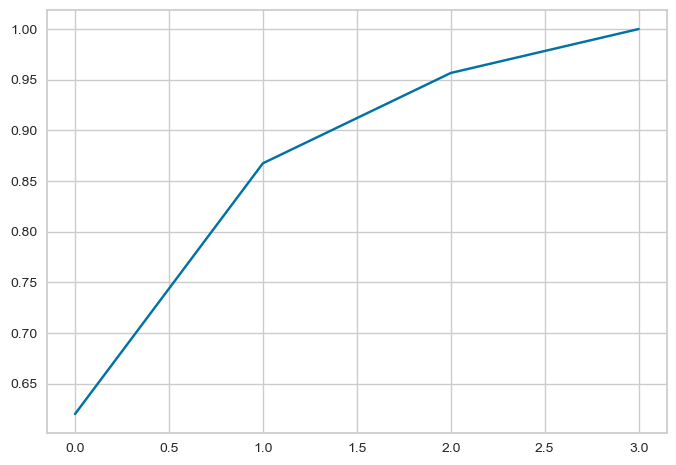

In [400]:
# cumsum = cumulative sum
plt.plot(np.cumsum(pca.explained_variance_ratio_));